<a href="https://colab.research.google.com/github/BhoomikaLohana/Customer-Segmentation-using-K-Means-Clustring/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Customer Segmentation for Marketing Analysis**

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and exploration

**1. Load the Dataset**

In [ ]:
#loading Dataset
df=pd.read_csv("/content/customer_segmentation_data.csv", index_col="id")

df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
data = df.copy()

In [ ]:
#information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 70.3+ KB


**2. Understanding the Data Structure**

In [ ]:
df.shape

(1000, 8)

In [ ]:
#Checking Data Types
df.dtypes


,0
age,int64
gender,object
income,int64
spending_score,int64
membership_years,int64
purchase_frequency,int64
preferred_category,object
last_purchase_amount,float64


In [ ]:
# Check for Missing values
df.isnull().sum()


,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


**3. Summary Statistics**

In [ ]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [ ]:
# Checking Unique Values
df.nunique()

,0
age,52
gender,3
income,996
spending_score,100
membership_years,10
purchase_frequency,50
preferred_category,5
last_purchase_amount,994


**4. Data Distribution**

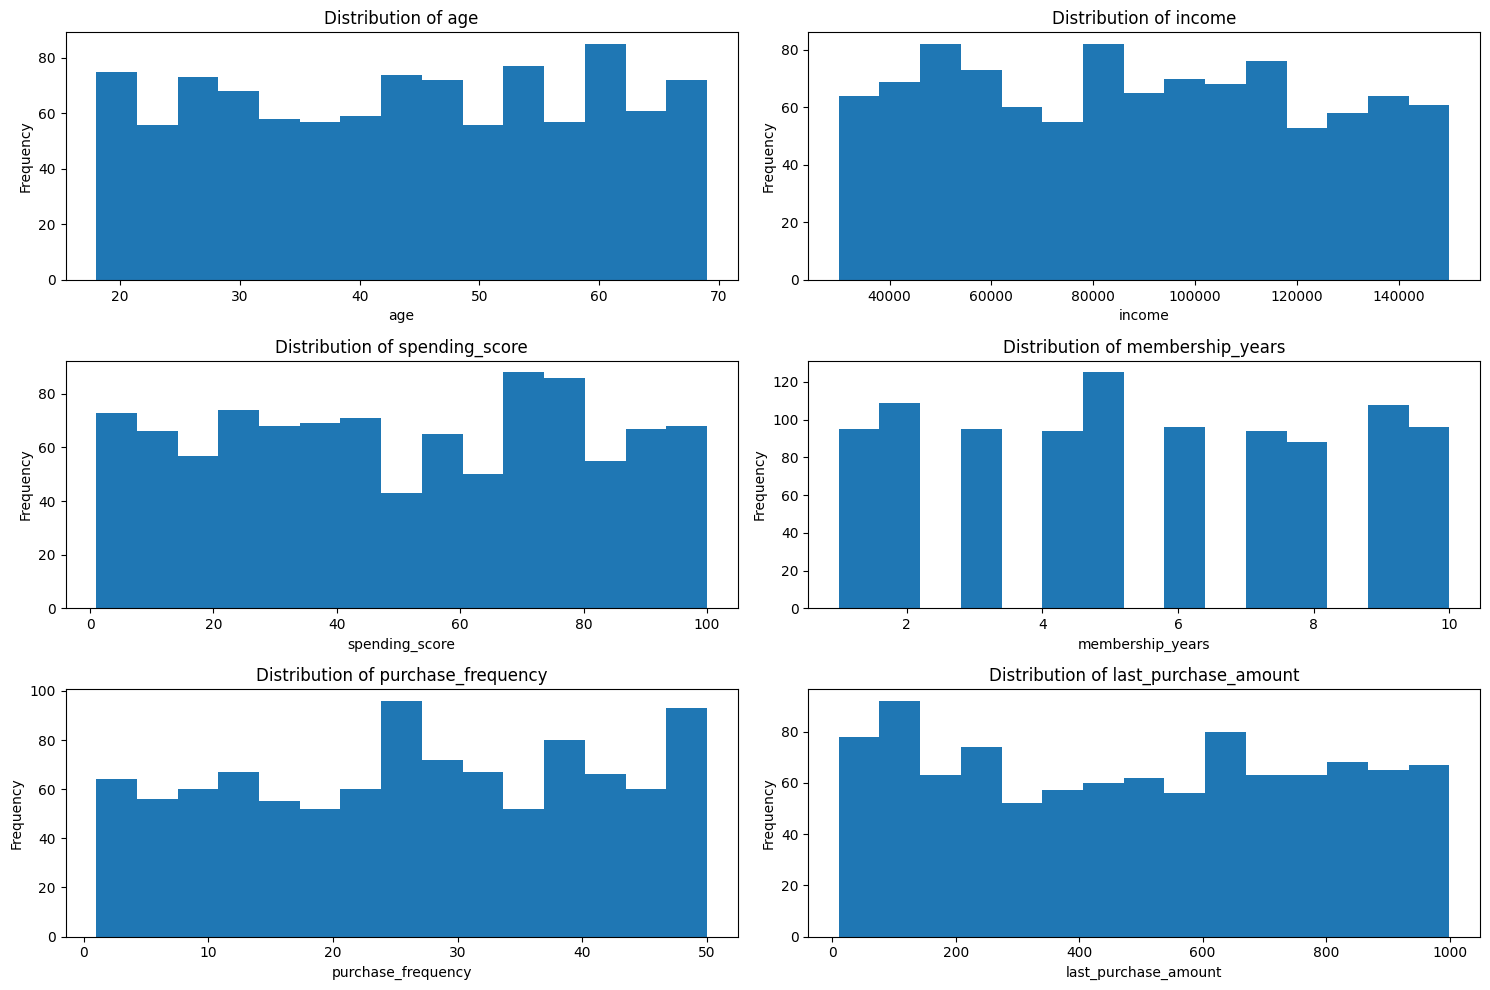

In [ ]:
# List of numerical features
numerical_features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

# histograms for each numerical feature
fig, axes = plt.subplots(3,2, figsize=(15, 10))
for i, feature in enumerate(numerical_features) :
  ax= axes[i // 2, i % 2]
  df[feature].hist(bins=15, ax=ax, grid=False)
  ax.set_title(f"Distribution of {feature}")
  ax.set_xlabel(feature)
  ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

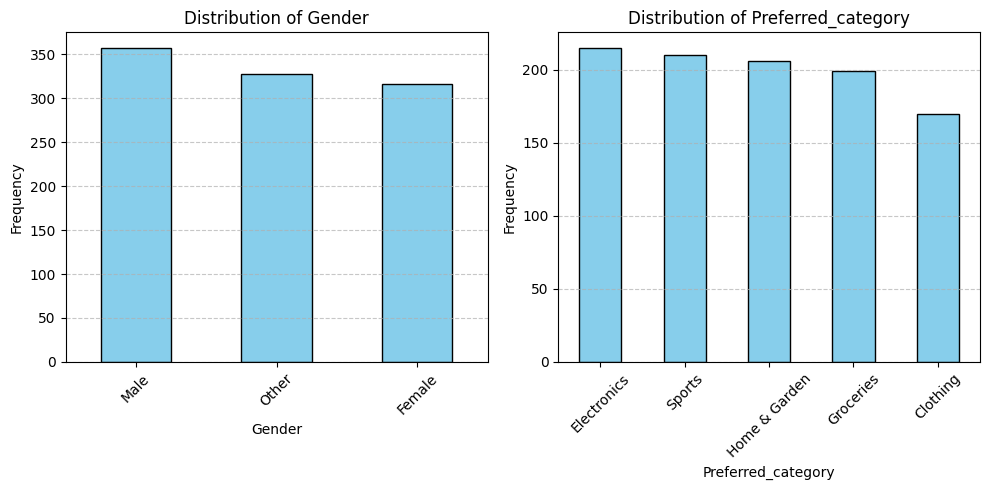

In [ ]:
# Visualizing Categorical Features

categorical_features = ['gender', 'preferred_category']

# Create subplots for the categorical features
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(10, 5))

for ax, feature in zip(axes, categorical_features):
    df[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f"Distribution of {feature.capitalize()}")
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


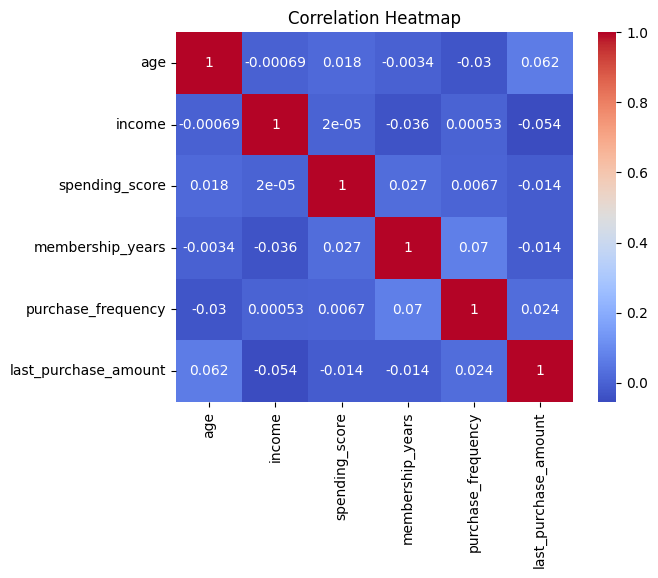

In [ ]:
# Heatmap
corr= df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**5. Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Column Scalling
columns_to_scale=['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
data_to_scale =df[columns_to_scale]
scaler= StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_df.index=df.index
df[columns_to_scale]=scaled_df
print(df.head())

         age  gender    income  spending_score  membership_years  \
id                                                                 
1  -0.384644  Female  0.316868        1.358468         -0.865010   
2  -1.515362  Female -0.282016        0.321865         -1.215358   
3   1.078639  Female  1.112778       -0.714738         -1.215358   
4  -0.251618   Other -1.210096        0.805613          1.237080   
5   1.411203  Female  1.523374       -1.025718         -0.865010   

    purchase_frequency preferred_category  last_purchase_amount  
id                                                               
1            -0.182348          Groceries             -1.281540  
2             1.082005             Sports             -1.523763  
3             0.098620           Clothing             -0.230005  
4            -1.516943      Home & Garden              1.690080  
5            -0.112106        Electronics             -0.491443  


In [ ]:
#Checking Unique categorical variables
df.select_dtypes("object").nunique()

,0
gender,3
preferred_category,5


In [ ]:
#convert categorical variables into Numerical variables using one-hot Encoding
df=pd.get_dummies(df,columns=["gender","preferred_category"],drop_first=True)
df

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,True,False,False,False,False,False
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,False,True,False,True,False,False
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,True,False,False,False,False,True


**6. Model Building and Customer segmentation**

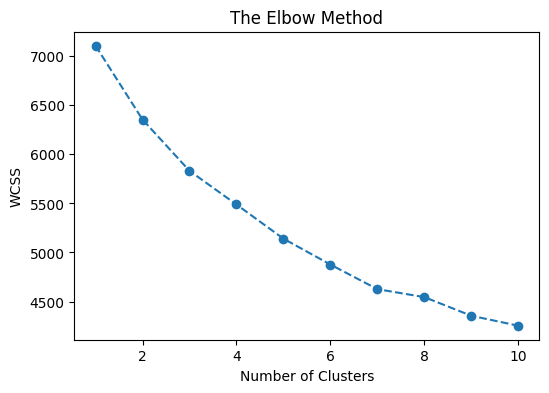

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Choosing the number of cluster K
x = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    x.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), x, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

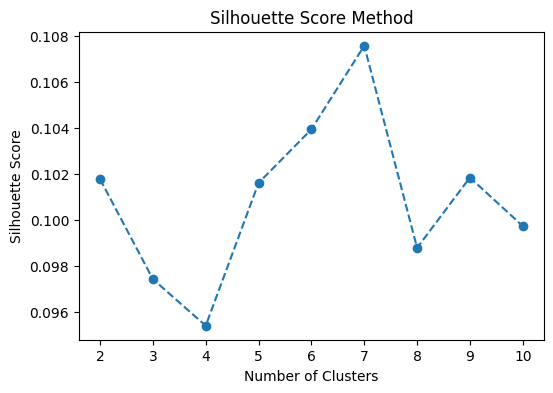

In [ ]:
# Checking silhouette score Method
silhouette_scores=[]
for k in range(2,11):
  Kmeans=KMeans(n_clusters=k,random_state=42)
  Kmeans.fit(df)
  score=silhouette_score(df,Kmeans.labels_)
  silhouette_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(range(2,11),silhouette_scores,marker="o",linestyle="--")
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [ ]:
Kmeans= KMeans(n_clusters=3, random_state=42)
Kmeans.fit(df)

df['cluster']= Kmeans.labels_

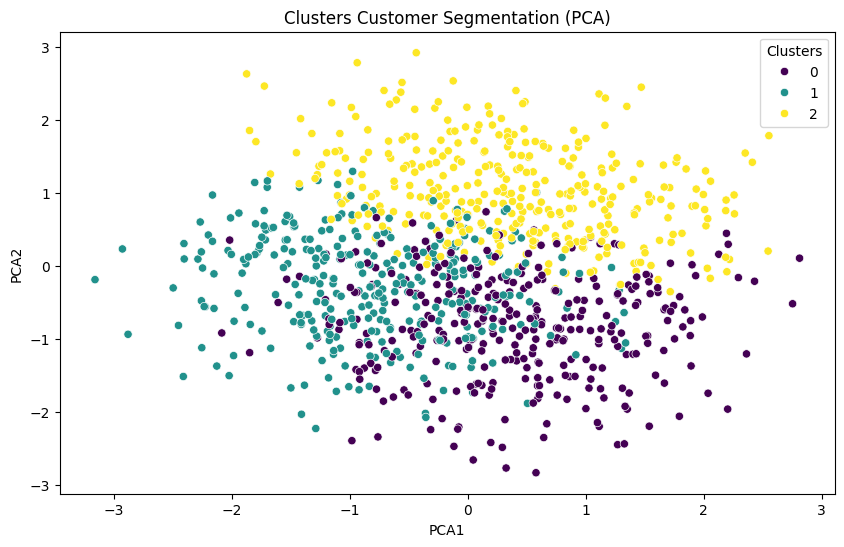

In [ ]:
from sklearn.decomposition import PCA
#performed pca for dimensionality reduction to 2 components
pca=PCA(n_components=2, random_state=42)
pca_components= pca.fit_transform(df.drop('cluster', axis=1, errors='ignore'))
df['PCA1']= pca_components[:,0]
df['PCA2']= pca_components[:,1]

Kmeans= KMeans(n_clusters=3, random_state=42)
labels= Kmeans.fit_predict(df.drop(['cluster','PCA1','PCA2'], axis=1, errors='ignore'))

df['clusters']= labels

# cisualize cluster based on pca components
plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='clusters', data=df, palette='viridis')
plt.title('Clusters Customer Segmentation (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Clusters', loc='upper right')
plt.show()


In [ ]:
label_0=df[df['cluster']==0]
label_1=df[df['cluster']==1]
label_2=df[df['cluster']==2]

In [ ]:
print(f"label 0 shape is: {label_0.shape}")
print(f"label 1 shape is: {label_1.shape}")
print(f"label 2 shape is: {label_2.shape}")

label 0 shape is: (325, 16)
label 1 shape is: (325, 16)
label 2 shape is: (350, 16)


In [ ]:
data["clusters"]= labels

In [ ]:
segment1= data.loc[(data["clusters"]==0)]
segment2= data.loc[(data["clusters"]==1)]
segment3= data.loc[(data["clusters"]==2)]

In [ ]:
segment1.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
2,21,Female,78852,60,2,42,Sports,41.93,0
6,31,Other,57305,24,3,30,Home & Garden,86.85,0


In [ ]:
segment2.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,1
3,60,Female,126573,30,2,28,Clothing,424.36,1


In [ ]:
segment3.head(2)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,clusters
id,,,,,,,,,
4,40,Other,47099,74,9,5,Home & Garden,991.93,2
8,43,Male,108115,94,9,27,Groceries,734.56,2


In [ ]:
# Select only numeric columns for the mean calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the mean for each cluster
cluster_profile = numeric_data.groupby(data['clusters']).mean()

# Add the size of each cluster using map to align the indices
cluster_profile['size'] = data['clusters'].map(data['clusters'].value_counts())

# Display the cluster profile
print(cluster_profile)


                age        income  spending_score  membership_years  \
clusters                                                              
0         30.181538  90800.246154       43.046154          6.073846   
1         47.920000  97625.316923       55.055385          4.790769   
2         52.571429  77892.834286       53.720000          5.537143   

          purchase_frequency  last_purchase_amount  clusters   size  
clusters                                                             
0                  34.578462            449.428185       0.0    NaN  
1                  17.916923            249.289200       1.0  325.0  
2                  27.242857            757.901486       2.0  325.0  


<ipython-input-93-743b57f56baa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='age', data=data, palette='viridis')


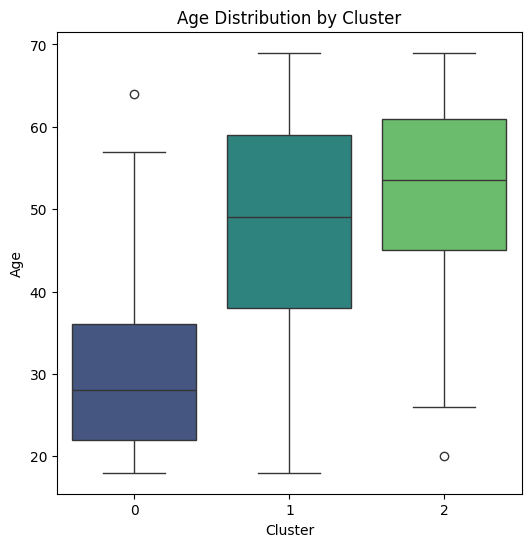

<ipython-input-93-743b57f56baa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='income', data=data, palette='viridis')


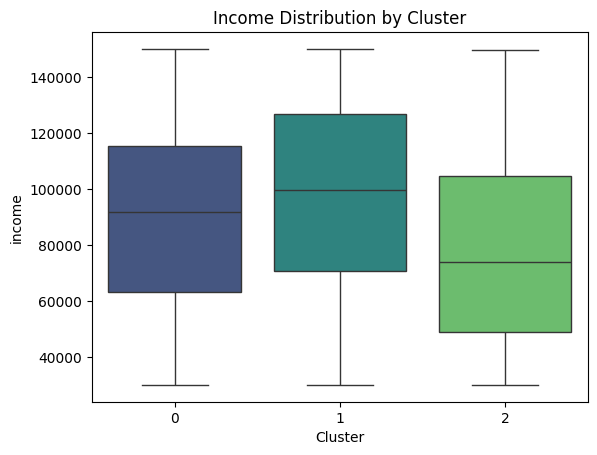

<ipython-input-93-743b57f56baa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clusters', y='last_purchase_amount', data=data, palette='viridis')


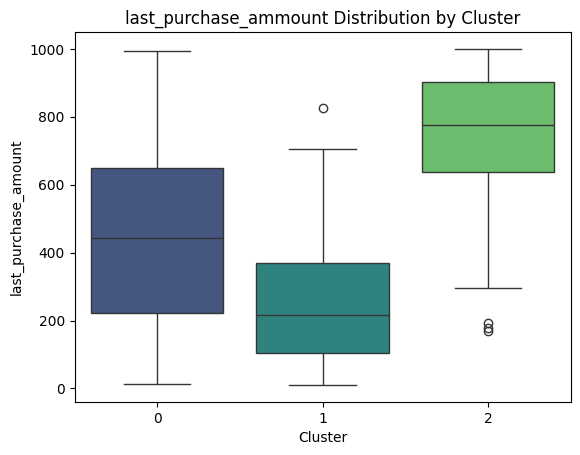

In [ ]:
#Visualize distribution for each cluster
plt.figure(figsize=(6,6))
sns.boxplot(x='clusters', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

sns.boxplot(x='clusters', y='income', data=data, palette='viridis')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('income')
plt.show()

sns.boxplot(x='clusters', y='last_purchase_amount', data=data, palette='viridis')
plt.title('last_purchase_ammount Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('last_purchase_amount')
plt.show()

In [ ]:
s=segment1['preferred_category'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
preferred_category,,,
Home & Garden,72,0.221538,22.2%
Electronics,70,0.215385,21.5%
Sports,67,0.206154,20.6%
Groceries,65,0.200000,20.0%
Clothing,51,0.156923,15.7%


In [ ]:
s=segment2['preferred_category'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
preferred_category,,,
Groceries,71,0.218462,21.8%
Sports,69,0.212308,21.2%
Electronics,68,0.209231,20.9%
Clothing,60,0.184615,18.5%
Home & Garden,57,0.175385,17.5%


In [ ]:
s=segment3['preferred_category'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
preferred_category,,,
Home & Garden,77,0.220000,22.0%
Electronics,77,0.220000,22.0%
Sports,74,0.211429,21.1%
Groceries,63,0.180000,18.0%
Clothing,59,0.168571,16.9%


In [ ]:
s=segment1['gender'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
gender,,,
Male,139,0.427692,42.8%
Female,102,0.313846,31.4%
Other,84,0.258462,25.8%


In [ ]:
s=segment2['gender'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
gender,,,
Female,124,0.381538,38.2%
Other,103,0.316923,31.7%
Male,98,0.301538,30.2%


In [ ]:
s=segment3['gender'].fillna('No')
count=s.value_counts()
percent=s.value_counts(normalize=True)
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'count':count, 'percent':percent, 'percent100':percent100})

,count,percent,percent100
gender,,,
Other,140,0.400000,40.0%
Male,120,0.342857,34.3%
Female,90,0.257143,25.7%


# **Interpretting each Segment**

SEGMENT 1:
         
*   Average Age: **30 years**
*   Average Income: **90,800**
*   Gender: **Male**  
*   Low spending Score: **43**
*   Purchase Frequency: **34**
*   Most Preferred Category: **Home and Garden**
    
SEGMENT 2:

*   Average Age: **47**
*   Average Income: **97625**
*   Gender: **Female**
*   High spending Score: **55**
*   Purchase Frequency: **17**
*   Most Preferred Category: **Groceries**

        
SEGMENT 3:
*   Average Age: **52**
*   Average Income: **77892**
*   Gender: **Other**
*   Moderate spending Score: **53**
*   Purchase Frequency: **27**
*   Most Preferred Category: **Home and Garden, Electronics**

## ** Actionable Insight and Recomendation**

**Segment 1:** Young Males with Low Spending Scores

* This segment consists of young customers (average age: 30) with a high income (90,800) but low spending (score: 43). They shop moderately (frequency: 34) and prefer the Home and Garden category, indicating an interest in household items.
* Introduce loyalty programs or rewards to incentivize increased spending and repeat purchases.
* Offer exclusive discounts on Home and Garden products to attract more purchases.
* Use online marketing campaigns tailored for younger males, such as DIY home improvement ideas or discounts on home decor.
* Promote bundle deals combining Home and Garden items with other complementary categories.


**Segment 2**:

* This segment comprises middle to older age customers (average age: 47) with the highest income (97,625) and a high spending score (55), indicating frequent and generous spending. Despite a lower purchase frequency (17), their spending per transaction is likely higher, with a clear preference for Groceries.

* Provide personalized grocery deals or premium options (organic or specialty products) to cater to their high spending potential.
* Offer premium memberships with perks like free delivery, priority service, or exclusive discounts.
*  Create seasonal promotions or grocery bundles targeting family or household needs.


**Segment 3**:
* This segment consists of older customers (average age: 52) with moderate income (77,892) and spending scores (53), indicating balanced spending behavior. They shop regularly (frequency: 27) and prefer Home and Garden and Electronics, showing interest in practical and technological products.
Business Recommendations:

* Cross-promote Electronics with Home and Garden products (e.g., smart home gadgets).
* offer in-store or online guides/tutorials on electronics to engage this segment.
*  Introduce special discounts or promotions for older customers to encourage loyalty.
* Highlight the practical benefits and ease of use of Electronics and Home and Garden products.
